In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import fbprophet
rcParams['figure.figsize'] = 15, 6

In [2]:
data = pd.read_csv('lebron_career.csv')
print(data.dtypes)
data.head()

game            int64
date           object
age            object
team           object
opp            object
result         object
mp             object
fg              int64
fga             int64
fgp           float64
q               int64
threeatt        int64
threep        float64
ft              int64
fta             int64
ftp           float64
orb             int64
drb             int64
trb             int64
ast             int64
stl             int64
blk             int64
tov             int64
pts             int64
game_score    float64
minus_plus      int64
dtype: object


,game,date,age,team,opp,result,mp,fg,fga,fgp,...,orb,drb,trb,ast,stl,blk,tov,pts,game_score,minus_plus
0,1,10/29/2003,18-303,CLE,SAC,L (-14),42:00:00,12,20,0.600,...,2,4,6,9,4,0,2,25,24.7,-9
1,2,10/30/2003,18-304,CLE,PHO,L (-9),41:00:00,8,17,0.471,...,2,10,12,8,1,0,7,21,14.7,-3
2,3,11/1/2003,18-306,CLE,POR,L (-19),39:00:00,3,12,0.250,...,0,4,4,6,2,0,2,8,5.0,-21
3,4,11/5/2003,18-310,CLE,DEN,L (-4),41:00:00,3,11,0.273,...,2,9,11,7,2,3,2,7,11.2,-3
4,5,11/7/2003,18-312,CLE,IND,L (-1),44:00:00,8,18,0.444,...,0,5,5,3,0,0,7,23,9.0,-7


In [17]:
data['game_score'].mean()

22.22473498233215

In [3]:
data['real_date'] = pd.to_datetime(data.date)
data.head()

,game,date,age,team,opp,result,mp,fg,fga,fgp,...,drb,trb,ast,stl,blk,tov,pts,game_score,minus_plus,real_date
0,1,10/29/2003,18-303,CLE,SAC,L (-14),42:00:00,12,20,0.600,...,4,6,9,4,0,2,25,24.7,-9,2003-10-29
1,2,10/30/2003,18-304,CLE,PHO,L (-9),41:00:00,8,17,0.471,...,10,12,8,1,0,7,21,14.7,-3,2003-10-30
2,3,11/1/2003,18-306,CLE,POR,L (-19),39:00:00,3,12,0.250,...,4,4,6,2,0,2,8,5.0,-21,2003-11-01
3,4,11/5/2003,18-310,CLE,DEN,L (-4),41:00:00,3,11,0.273,...,9,11,7,2,3,2,7,11.2,-3,2003-11-05
4,5,11/7/2003,18-312,CLE,IND,L (-1),44:00:00,8,18,0.444,...,5,5,3,0,0,7,23,9.0,-7,2003-11-07


In [4]:
timeseries = data.set_index('real_date')
print(timeseries.index)
timeseries.head()

DatetimeIndex(['2003-10-29', '2003-10-30', '2003-11-01', '2003-11-05',
               '2003-11-07', '2003-11-08', '2003-11-10', '2003-11-12',
               '2003-11-14', '2003-11-15',
               ...
               '2018-03-03', '2018-03-05', '2018-03-07', '2018-03-09',
               '2018-03-11', '2018-03-13', '2018-03-15', '2018-03-17',
               '2018-03-19', '2018-03-21'],
              dtype='datetime64[ns]', name='real_date', length=1132, freq=None)


,game,date,age,team,opp,result,mp,fg,fga,fgp,...,orb,drb,trb,ast,stl,blk,tov,pts,game_score,minus_plus
real_date,,,,,,,,,,,,,,,,,,,,,
2003-10-29,1,10/29/2003,18-303,CLE,SAC,L (-14),42:00:00,12,20,0.600,...,2,4,6,9,4,0,2,25,24.7,-9
2003-10-30,2,10/30/2003,18-304,CLE,PHO,L (-9),41:00:00,8,17,0.471,...,2,10,12,8,1,0,7,21,14.7,-3
2003-11-01,3,11/1/2003,18-306,CLE,POR,L (-19),39:00:00,3,12,0.250,...,0,4,4,6,2,0,2,8,5.0,-21
2003-11-05,4,11/5/2003,18-310,CLE,DEN,L (-4),41:00:00,3,11,0.273,...,2,9,11,7,2,3,2,7,11.2,-3
2003-11-07,5,11/7/2003,18-312,CLE,IND,L (-1),44:00:00,8,18,0.444,...,0,5,5,3,0,0,7,23,9.0,-7


In [5]:
points_ts = timeseries[['pts']]
points_ts.head()

,pts
real_date,
2003-10-29,25
2003-10-30,21
2003-11-01,8
2003-11-05,7
2003-11-07,23


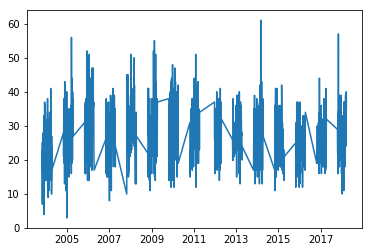

In [6]:
plt.plot(points_ts)

In [7]:
import fbprophet

# FB Prophet requires one column of dates named 'ds' and one column of values named 'y'
prophet_ts = points_ts.rename(columns={'pts': 'y'})
prophet_ts['ds'] = prophet_ts.index
prophet_ts.head()

,y,ds
real_date,,
2003-10-29,25,2003-10-29
2003-10-30,21,2003-10-30
2003-11-01,8,2003-11-01
2003-11-05,7,2003-11-05
2003-11-07,23,2003-11-07


In [8]:
points_prophet = fbprophet.Prophet(changepoint_prior_scale=0.02)
points_prophet.fit(prophet_ts)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\karis\Anaconda3\envs\pythondata\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [14]:
points_forecast = points_prophet.make_future_dataframe(periods=365*10, freq='D')  # Forecast 10 years
points_forecast = points_prophet.predict(points_forecast)

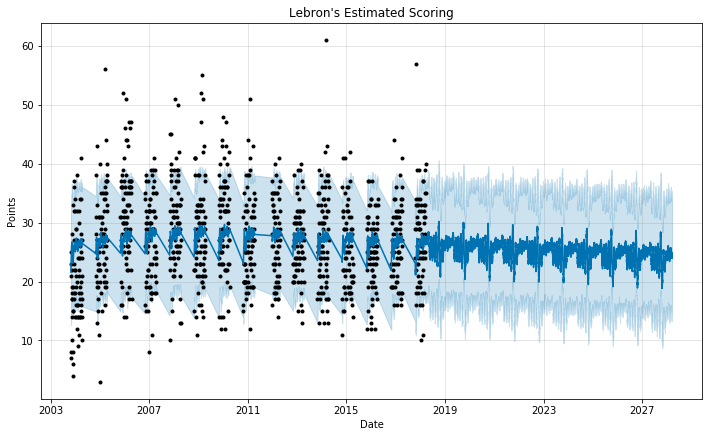

In [18]:
points_prophet.plot(points_forecast, xlabel='Date', ylabel='Points')
plt.title("Lebron's Estimated Scoring")
plt.savefig("lebron_prediction.png")

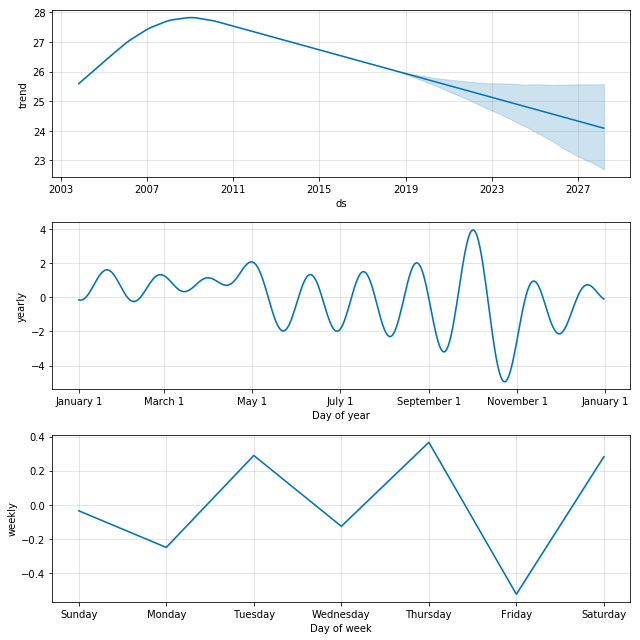

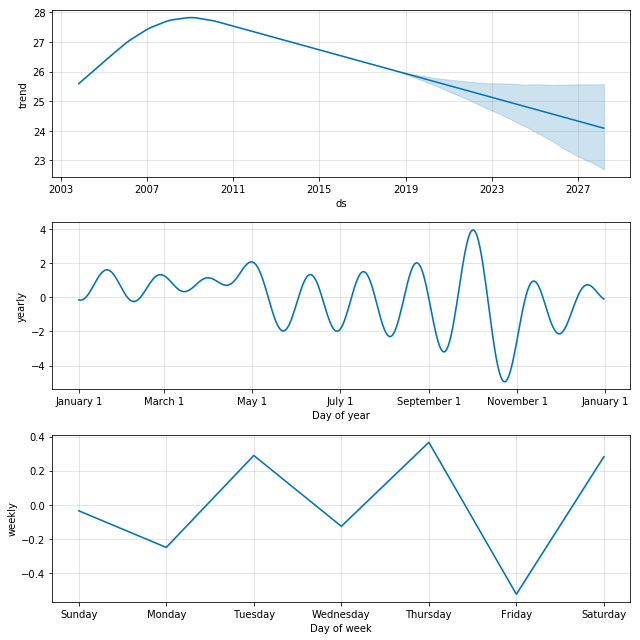

In [11]:
points_prophet.plot_components(points_forecast)